In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\user\Desktop\Multivariate\diabetes_prediction_dataset.csv")
data.drop('gender', axis=1, inplace=True)
data.describe()
data.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,never,25.19,6.6,140,0
1,54.0,0,0,No Info,27.32,6.6,80,0
2,28.0,0,0,never,27.32,5.7,158,0
3,36.0,0,0,current,23.45,5.0,155,0
4,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [4]:
label_encoders = {}
for column in ['smoking_history']:
    data_encoded = LabelEncoder()
    data[column] = data_encoded.fit_transform(data[column])
    label_encoders[column] = data_encoded



In [5]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
X_train.columns

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [9]:
pca = PCA(n_components=6, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)

In [10]:
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [11]:
cm = pca.components_
print(cm)

[[ 0.55530422  0.38798948  0.30796909  0.33248237  0.45391911  0.25088069
   0.25831805]
 [-0.18193901 -0.01402745  0.15675401 -0.40250965 -0.24904854  0.60349911
   0.5948775 ]
 [ 0.11794142  0.25497097  0.73260306 -0.42216518 -0.24897353 -0.27255673
  -0.26433683]
 [-0.06729312  0.79170279 -0.48599192 -0.35279476  0.04631881 -0.01847488
  -0.07442638]
 [ 0.03364911 -0.04933912 -0.04149284 -0.14979807  0.1356419  -0.69776647
   0.68337069]
 [ 0.15032603 -0.35077677 -0.06114946 -0.61053231  0.65550724  0.10588299
  -0.19227022]]


In [13]:
import time
svm = SVC(kernel='linear')
time1 = time.time()
svm.fit(X_train_pca, y_train)
y_predict = svm.predict(X_test_pca)
time2 = time.time()
with_pca_time = time2 - time1
print(with_pca_time)

101.3896119594574


In [14]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy: 0.9591
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.93      0.57      0.70      1708

    accuracy                           0.96     20000
   macro avg       0.94      0.78      0.84     20000
weighted avg       0.96      0.96      0.95     20000



In [15]:
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix

array([[18216,    76],
       [  742,   966]], dtype=int64)

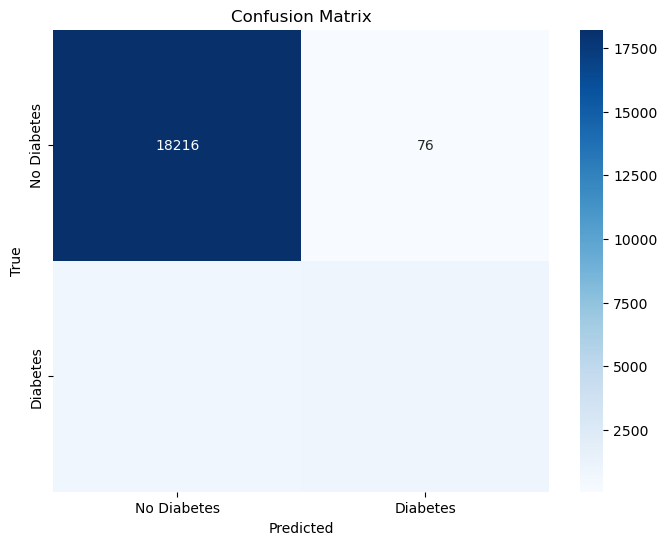

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

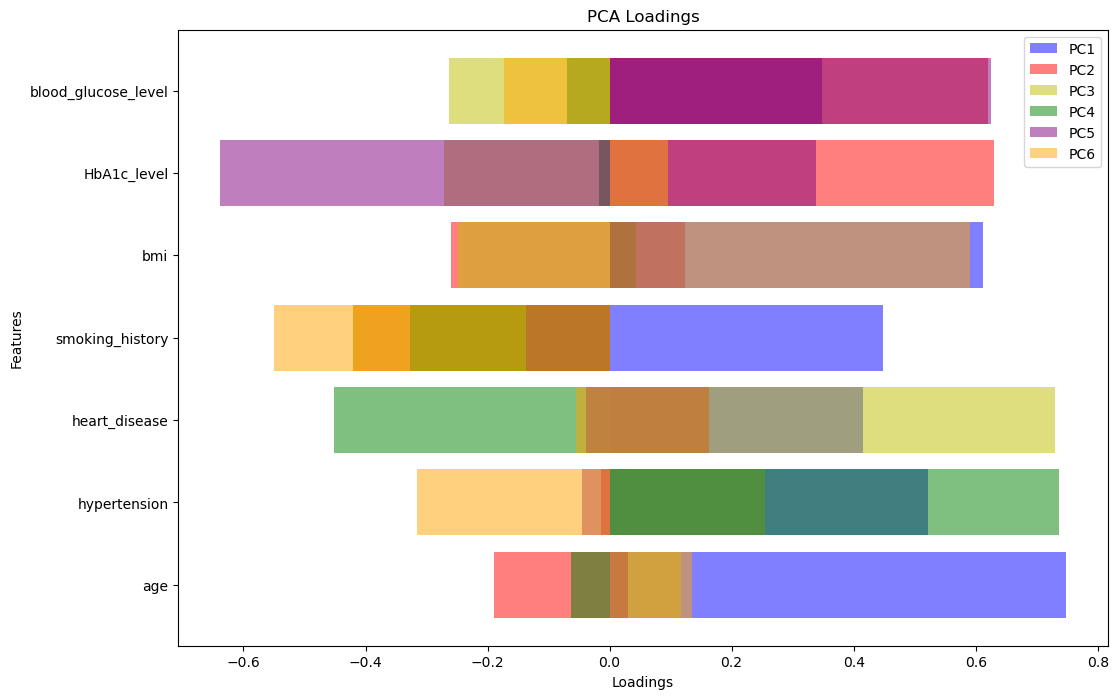

In [17]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_features = X.shape[1]
plt.figure(figsize=(12, 8))
plt.barh(range(num_features), loadings[:, 0], alpha=0.5, align='center', color='b', label='PC1')
plt.barh(range(num_features), loadings[:, 1], alpha=0.5, align='center', color='r', label='PC2')
plt.barh(range(num_features), loadings[:, 2], alpha=0.5, align='center', color='y', label='PC3')
plt.barh(range(num_features), loadings[:, 3], alpha=0.5, align='center', color='g', label='PC4')
plt.barh(range(num_features), loadings[:, 4], alpha=0.5, align='center', color='purple', label='PC5')
plt.barh(range(num_features), loadings[:, 5], alpha=0.5, align='center', color='orange', label='PC6')
plt.yticks(np.arange(num_features), X.columns)
plt.title('PCA Loadings')
plt.xlabel('Loadings')
plt.ylabel('Features')
plt.legend()
plt.show()

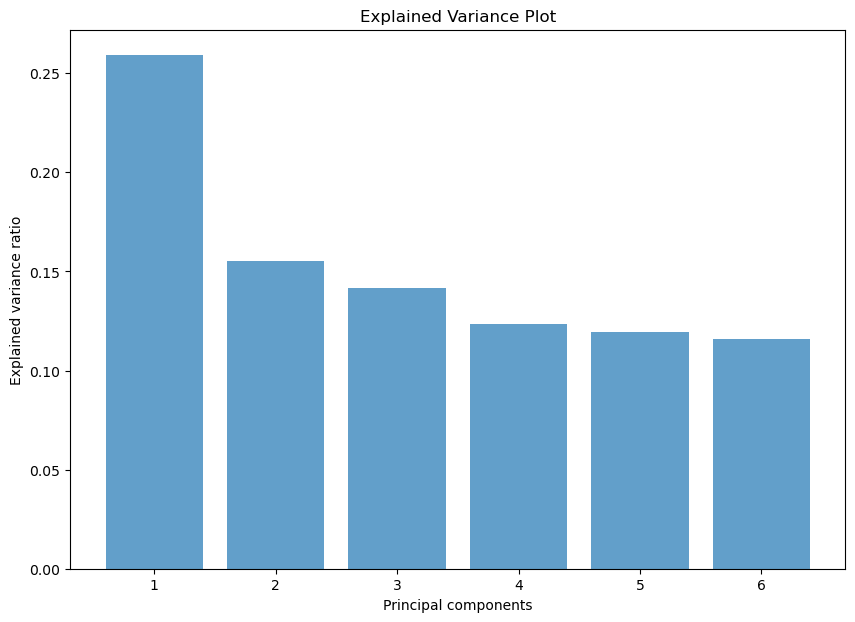

In [25]:
# Explained Variance Plot
plt.figure(figsize=(10, 7))
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Plot')
plt.show()


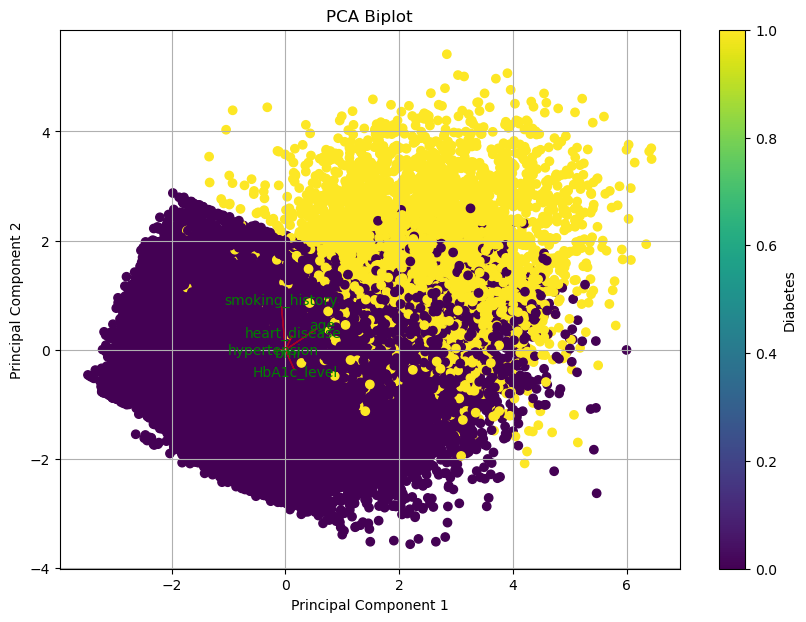

In [28]:
# PCA Biplot
def biplot(score, coeff, y):
    xs = score[:, 0]
    ys = score[:, 1]
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(xs, ys, c=y, cmap='viridis')
    plt.colorbar(scatter, label='Diabetes')
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, X.columns[i], color='g', ha='center', va='center')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Biplot')
    plt.grid()
    plt.show()

biplot(X_train_pca, pca.components_, y_train)


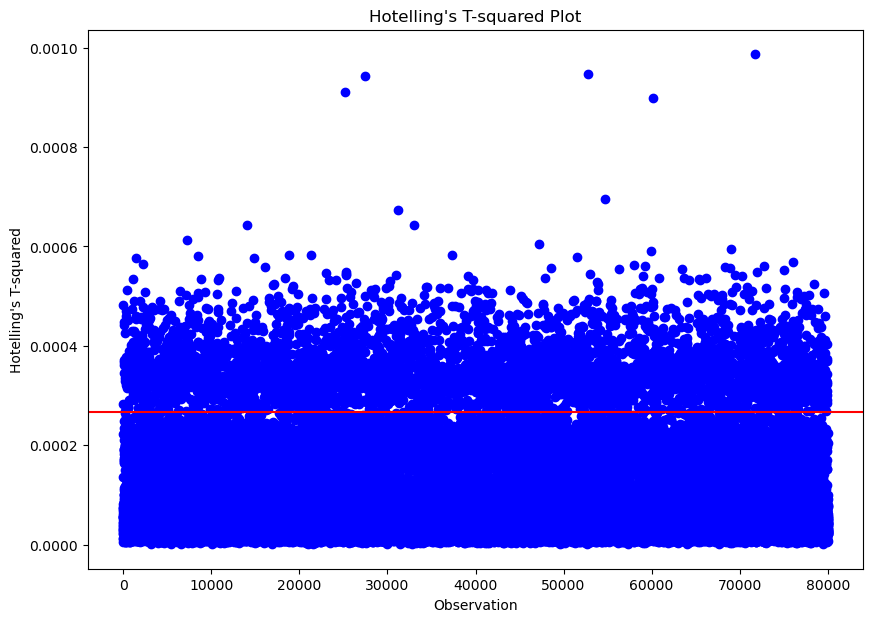

In [29]:
# Hotelling's T-squared
T2 = np.sum((X_train_pca / pca.singular_values_)**2, axis=1)
plt.figure(figsize=(10, 7))
plt.plot(T2, 'bo')
plt.axhline(y=np.percentile(T2, 95), color='r', linestyle='-')
plt.xlabel('Observation')
plt.ylabel('Hotelling\'s T-squared')
plt.title('Hotelling\'s T-squared Plot')
plt.show()


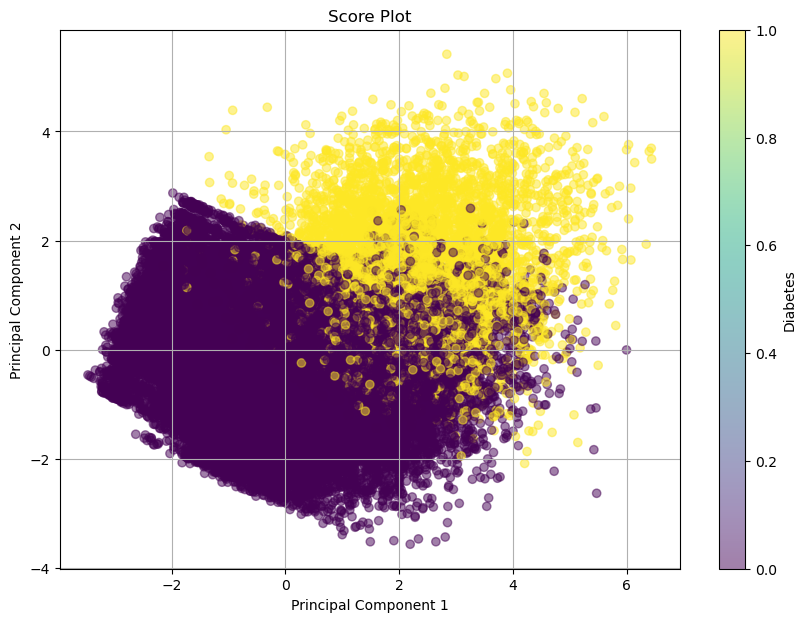

In [30]:
# Score Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Diabetes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Score Plot')
plt.grid()
plt.show()


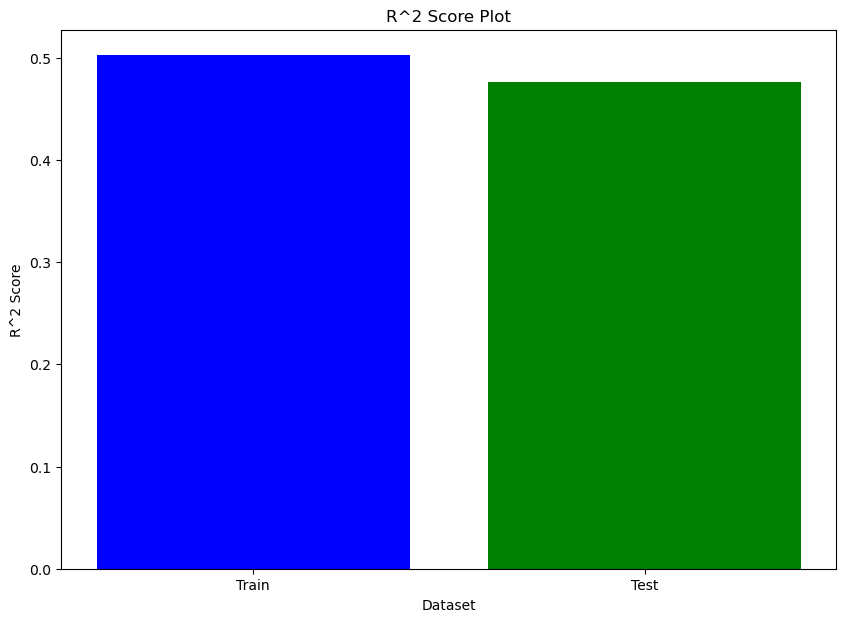

In [31]:
# R^2 Plot
from sklearn.metrics import r2_score

y_train_pred = svm.predict(X_train_pca)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_predict)

plt.figure(figsize=(10, 7))
plt.bar(['Train', 'Test'], [r2_train, r2_test], color=['blue', 'green'])
plt.ylabel('R^2 Score')
plt.xlabel('Dataset')
plt.title('R^2 Score Plot')
plt.show()


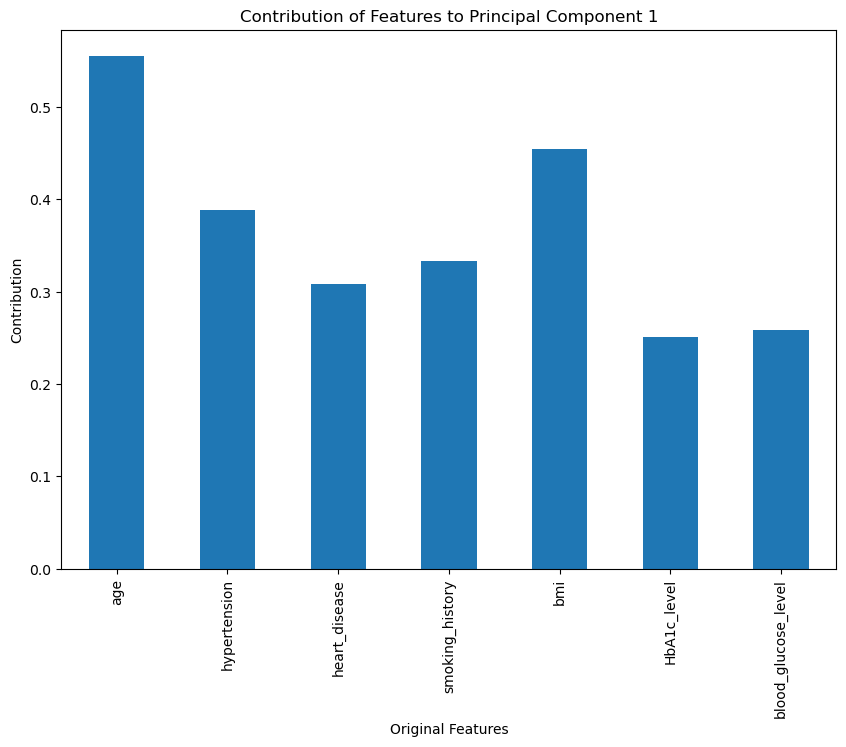

In [32]:
# Contribution Plot
components = pca.components_
contribution = pd.DataFrame(components.T, columns=['PC'+str(i+1) for i in range(components.shape[0])], index=X.columns)
plt.figure(figsize=(10, 7))
contribution['PC1'].plot(kind='bar')
plt.ylabel('Contribution')
plt.xlabel('Original Features')
plt.title('Contribution of Features to Principal Component 1')
plt.show()


### Without PCA

In [18]:
scaler2 = StandardScaler()
X_scaled2 = scaler2.fit_transform(X_train)

In [19]:
svm2 = SVC(kernel='linear')
time1 = time.time()
svm2.fit(X_scaled2, y_train)
time2 = time.time()
without_pca_time = time2 - time1
print(without_pca_time)

90.12445640563965


In [22]:
x_test_scaled2 = scaler2.transform(X_test)
y_predict2 = svm2.predict(x_test_scaled2)
print("Accuracy:", accuracy_score(y_test, y_predict2))
print(classification_report(y_test, y_predict2))

Accuracy: 0.95885
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.92      0.57      0.70      1708

    accuracy                           0.96     20000
   macro avg       0.94      0.78      0.84     20000
weighted avg       0.96      0.96      0.95     20000



In [23]:
conf_matrix2 = confusion_matrix(y_test, y_predict2)
conf_matrix2

array([[18211,    81],
       [  742,   966]], dtype=int64)

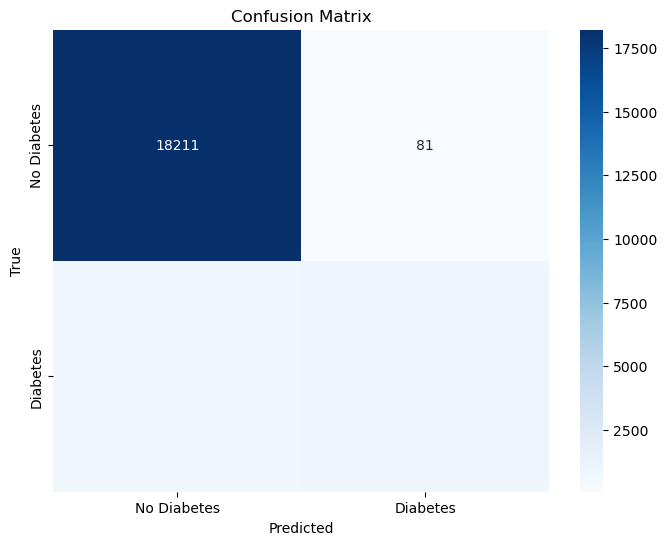

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()